In [2]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

C:\Users\moinu\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
Meta_Data_CSV = pd.read_csv("Dataset/UrbanSound8K.csv")


In [8]:
print(Meta_Data_CSV.head(-1))


         slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8726     99812-1-1-0.wav   99812   89.207778   93.207778         2     7   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   

      classID             class  
0           3          dog_bark  
1           2  chil

In [9]:
print(Meta_Data_CSV["class"].value_counts())


jackhammer          1000
engine_idling       1000
children_playing    1000
drilling            1000
air_conditioner     1000
dog_bark            1000
street_music        1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


In [10]:
print(Meta_Data_CSV.isnull().sum())


slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64


In [4]:
File_Name_Array = np.array(Meta_Data_CSV["slice_file_name"])
Fold_Array = np.array(Meta_Data_CSV["fold"])
Class_Array = np.array(Meta_Data_CSV["class"])

# if it is necessary

In [13]:
print(File_Name_Array)


['100032-3-0-0.wav' '100263-2-0-117.wav' '100263-2-0-121.wav' ...
 '99812-1-4-0.wav' '99812-1-5-0.wav' '99812-1-6-0.wav']


In [14]:
print(Fold_Array)


[5 5 5 ... 7 7 7]


In [15]:
print(Class_Array)

['dog_bark' 'children_playing' 'children_playing' ... 'car_horn'
 'car_horn' 'car_horn']


In [5]:
Path_Wav_List = []
Category_List = []

for path_number in range(8732):
    File_Path_Name = "Dataset/fold" + str(Meta_Data_CSV["fold"][path_number]) + "/" + Meta_Data_CSV["slice_file_name"][path_number]
    Path_Wav_List.append(File_Path_Name)
    Category_List.append(Meta_Data_CSV["class"][path_number])

In [17]:
print(Path_Wav_List[0:5])

['Dataset/fold5/100032-3-0-0.wav', 'Dataset/fold5/100263-2-0-117.wav', 'Dataset/fold5/100263-2-0-121.wav', 'Dataset/fold5/100263-2-0-126.wav', 'Dataset/fold5/100263-2-0-137.wav']


In [18]:
print(Category_List[0:5])

['dog_bark', 'children_playing', 'children_playing', 'children_playing', 'children_playing']


In [6]:
Path_Wav_Series = pd.Series(Path_Wav_List,name="WAV").astype(str)
Category_Series = pd.Series(Category_List,name="CATEGORY")

In [20]:
print(Path_Wav_Series)

0         Dataset/fold5/100032-3-0-0.wav
1       Dataset/fold5/100263-2-0-117.wav
2       Dataset/fold5/100263-2-0-121.wav
3       Dataset/fold5/100263-2-0-126.wav
4       Dataset/fold5/100263-2-0-137.wav
                      ...               
8727       Dataset/fold7/99812-1-2-0.wav
8728       Dataset/fold7/99812-1-3-0.wav
8729       Dataset/fold7/99812-1-4-0.wav
8730       Dataset/fold7/99812-1-5-0.wav
8731       Dataset/fold7/99812-1-6-0.wav
Name: WAV, Length: 8732, dtype: object


In [21]:
print(Category_Series)

0               dog_bark
1       children_playing
2       children_playing
3       children_playing
4       children_playing
              ...       
8727            car_horn
8728            car_horn
8729            car_horn
8730            car_horn
8731            car_horn
Name: CATEGORY, Length: 8732, dtype: object


In [8]:
Main_Train_Data = pd.concat([Path_Wav_Series,Category_Series],axis=1)
print(Main_Train_Data.head(-1))

                                   WAV          CATEGORY
0       Dataset/fold5/100032-3-0-0.wav          dog_bark
1     Dataset/fold5/100263-2-0-117.wav  children_playing
2     Dataset/fold5/100263-2-0-121.wav  children_playing
3     Dataset/fold5/100263-2-0-126.wav  children_playing
4     Dataset/fold5/100263-2-0-137.wav  children_playing
...                                ...               ...
8726     Dataset/fold7/99812-1-1-0.wav          car_horn
8727     Dataset/fold7/99812-1-2-0.wav          car_horn
8728     Dataset/fold7/99812-1-3-0.wav          car_horn
8729     Dataset/fold7/99812-1-4-0.wav          car_horn
8730     Dataset/fold7/99812-1-5-0.wav          car_horn

[8731 rows x 2 columns]


In [9]:
print(Main_Train_Data["CATEGORY"].value_counts())

dog_bark            1000
drilling            1000
street_music        1000
children_playing    1000
air_conditioner     1000
engine_idling       1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: CATEGORY, dtype: int64


In [10]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)
print(Main_Train_Data.head(-1))

                                   WAV         CATEGORY
0       Dataset/fold8/196561-3-0-9.wav         dog_bark
1       Dataset/fold6/122738-9-0-3.wav     street_music
2        Dataset/fold9/54976-4-0-2.wav         drilling
3       Dataset/fold1/108041-9-0-4.wav     street_music
4      Dataset/fold1/176787-5-0-20.wav    engine_idling
...                                ...              ...
8726    Dataset/fold5/104998-7-0-5.wav       jackhammer
8727  Dataset/fold7/209992-5-2-138.wav    engine_idling
8728    Dataset/fold8/41364-9-0-24.wav     street_music
8729    Dataset/fold7/157940-9-0-0.wav     street_music
8730   Dataset/fold6/184805-0-0-99.wav  air_conditioner

[8731 rows x 2 columns]


In [27]:
Main_Train_Data.to_csv("Wav_Type.csv")

In [11]:
def noise_function(data):
    noise_value = 0.009 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    
    return data

def stretch_function(data,rate=0.8):
    
    return librosa.effects.time_stretch(data,rate)

def shift_function(data):
    shift_range = int(np.random.uniform(-5,5) * 1000)
    
    return np.roll(data,shift_range)

def pitch_function(data,sampling_rate,pitch_factor=0.5):
    
    return librosa.effects.pitch_shift(data,sampling_rate,pitch_factor)

def specshow_function(wav_path):
    figure = plt.figure(figsize=(13,7))
    
    audio_type,sample_rate = librosa.load(wav_path)
    
    stft_audio = librosa.stft(audio_type)
    Db_audio = librosa.amplitude_to_db(abs(stft_audio))
    librosa.display.specshow(Db_audio,sr=sample_rate,x_axis="time",y_axis="hz")
    
def waveplot_function(wav_path):
    figure = plt.figure(figsize=(13,7))
    
    audio_type,sample_rate = librosa.load(wav_path)
    librosa.display.waveplot(audio_type,sr=sample_rate)
    
def playing_function(wav_path):
    
    audio_type,sample_rate = librosa.load(wav_path)
    
    return Audio(audio_type,rate=sample_rate)

In [16]:
sample_rate = 22050

In [12]:
def extract_function(data):
    
    output_result = np.array([])
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))
    
    stft_output = np.abs(librosa.stft(data))
    chroma_output = np.mean(librosa.feature.chroma_stft(S=stft_output,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_output))
    
    mfcc_output = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_output))
    
    root_output = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_output))
    
    mel_output = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mel_output))
    
    tonn_output = np.mean(librosa.feature.tonnetz(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,tonn_output))
    
    return output_result

In [13]:
def export_function(path):
    
    data,sample_rate = librosa.load(path,duration=1.0)
    
    output_One = extract_function(data)
    result = np.array(output_One)
    
    noise_output = noise_function(data)
    output_Two = extract_function(noise_output)
    result = np.vstack((result,output_Two))
    
    stretch_output = stretch_function(data)
    stretch_pitch = pitch_function(stretch_output,sample_rate)
    output_Three = extract_function(stretch_pitch)
    result = np.vstack((result,output_Three))
    
    shift_output = shift_function(data)
    output_Four = extract_function(shift_output)
    result = np.vstack((result,output_Four))
    
    return result

In [32]:
plt.style.use("dark_background")

playing_function(Main_Train_Data["WAV"][2])

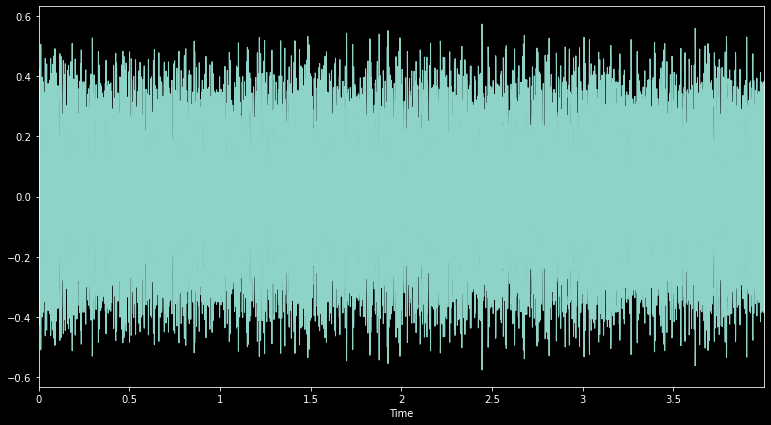

In [36]:
waveplot_function(Main_Train_Data["WAV"][2])

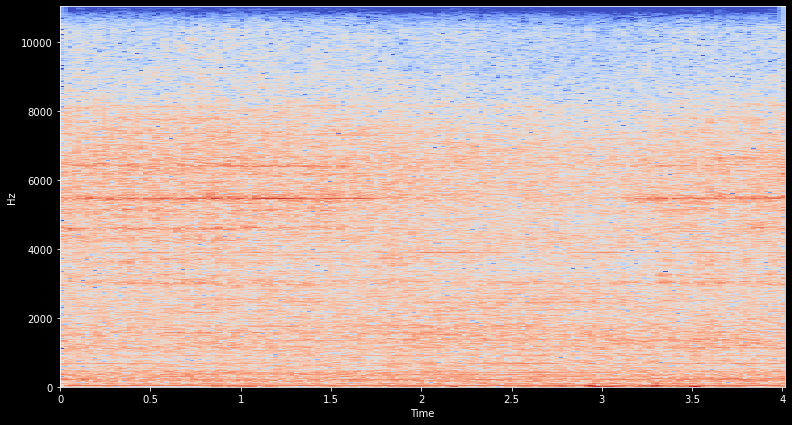

In [41]:
specshow_function(Main_Train_Data["WAV"][145])

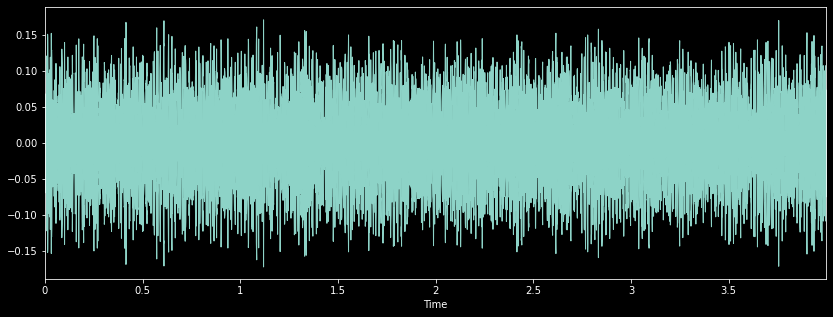

In [42]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][2000])

noise_injection = noise_function(wav_type)

librosa.display.waveplot(noise_injection,sr=sample_rate)
Audio(noise_injection,rate=sample_rate)

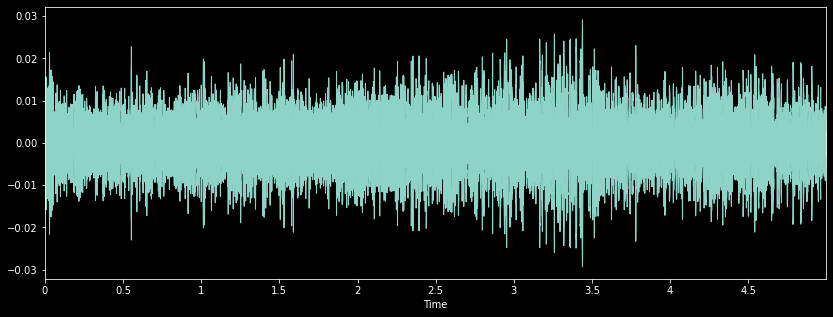

In [43]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][450])

stretch_audio = stretch_function(wav_type)
librosa.display.waveplot(stretch_audio,sr=sample_rate)
Audio(stretch_audio,rate=sample_rate)

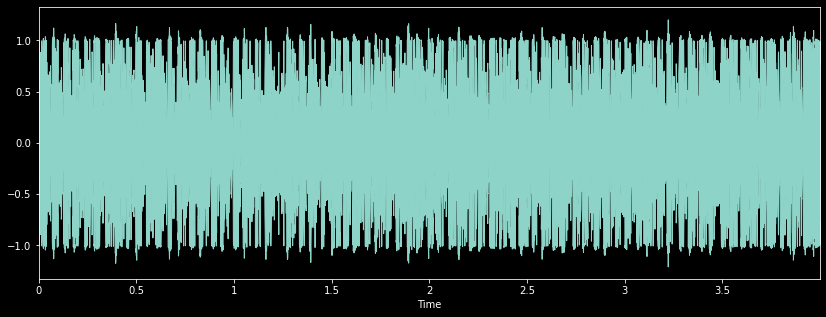

In [44]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][1544])

shift_audio = shift_function(wav_type)
librosa.display.waveplot(shift_audio,sr=sample_rate)
Audio(shift_audio,rate=sample_rate)

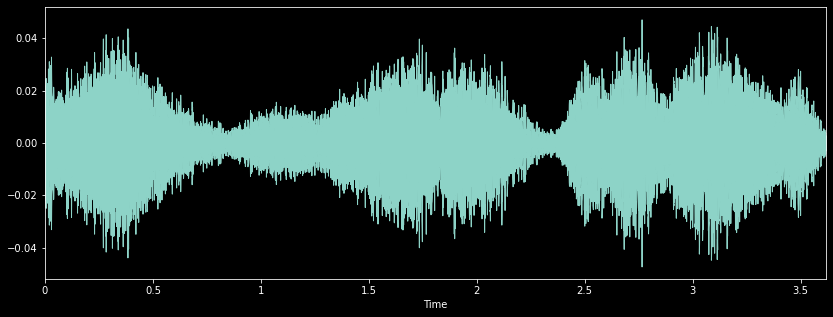

In [45]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][637])

pitch_audio = pitch_function(wav_type,sample_rate)
librosa.display.waveplot(pitch_audio,sr=sample_rate)
Audio(pitch_audio,rate=sample_rate)

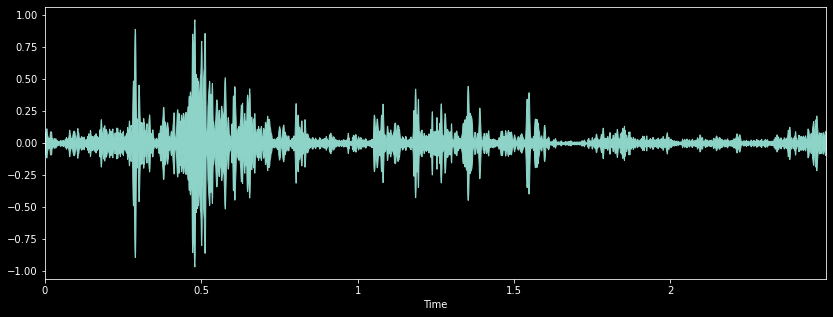

In [46]:
#Same Timeframe

figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][5],duration=2.5,offset=0.6)
librosa.display.waveplot(wav_type,sr=sample_rate)
Audio(wav_type,rate=sample_rate)

In [47]:
#Checking

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][5],duration=2.5,offset=0.6)

print(wav_type.shape)
print(wav_type.dtype)
print(sample_rate)

(55125,)
float32
22050


In [48]:
sample_rate = 22050

x_Train = []
y_Train = []


for path,category_wav in zip(Main_Train_Data.WAV,Main_Train_Data.CATEGORY):
    
    wav_features = export_function(path)
    
    for indexing in wav_features:
        x_Train.append(indexing)
        y_Train.append(category_wav)

In [49]:
New_Features_Wav = pd.DataFrame(x_Train)
New_Features_Wav["CATEGORY"] = y_Train

New_Features_Wav.to_csv("New_Wav_Features_Data.csv",index=False)

In [50]:
New_Features_Wav.head(-1)


,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,CATEGORY
0,0.098566,0.871522,0.540084,0.521832,0.684049,0.659406,0.500841,0.595396,0.670797,0.464831,...,8.038217e-05,2.896732e-05,2.622696e-06,-0.016298,-0.006546,0.037400,0.074779,0.002713,-0.008135,street_music
1,0.098477,0.871815,0.540328,0.522246,0.683896,0.659482,0.501421,0.595245,0.670575,0.464525,...,8.301233e-05,3.107791e-05,4.459749e-06,-0.016267,-0.006518,0.037398,0.074814,0.002671,-0.008126,street_music
2,0.100848,0.875557,0.496965,0.487443,0.639452,0.591784,0.440499,0.560187,0.611627,0.413103,...,1.187899e-05,4.595527e-06,1.409642e-06,0.015690,-0.004376,-0.052409,0.079064,-0.006828,0.023206,street_music
3,0.099421,0.870151,0.536888,0.524355,0.694037,0.666182,0.501681,0.591686,0.675235,0.466929,...,8.087776e-05,2.990849e-05,3.000079e-06,-0.010340,-0.023957,0.048607,0.060006,-0.001945,-0.008028,street_music
4,0.047108,0.712387,0.710270,0.798388,0.876454,0.772832,0.725270,0.747244,0.797047,0.842663,...,1.183513e-05,4.426488e-06,1.372738e-06,0.011215,-0.036892,-0.034000,0.014488,0.000453,-0.004769,street_music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34922,0.060567,0.712947,0.643858,0.496891,0.269065,0.167341,0.197318,0.224719,0.208705,0.152470,...,6.378930e-11,7.336307e-11,7.937317e-11,0.032279,-0.033772,0.124977,0.000471,-0.045351,-0.005932,dog_bark
34923,0.060907,0.742962,0.635503,0.464348,0.225448,0.144491,0.190055,0.220756,0.219721,0.157516,...,7.589417e-08,7.458348e-08,7.377914e-08,0.000326,-0.005781,0.071989,-0.016542,-0.012038,-0.020598,dog_bark
34924,0.276756,0.900935,0.864405,0.689064,0.638855,0.599290,0.552229,0.551954,0.569964,0.618976,...,3.407240e-01,9.892733e-02,1.123263e-02,0.009697,-0.004258,-0.002856,0.027116,-0.008766,0.005801,drilling
34925,0.282637,0.889526,0.739484,0.646851,0.626788,0.562957,0.556916,0.562501,0.606304,0.682846,...,3.432130e-01,9.988208e-02,1.306900e-02,0.008525,-0.003353,-0.003035,0.027161,-0.008055,0.005636,drilling


In [51]:
print(New_Features_Wav["CATEGORY"].value_counts())


engine_idling       4000
street_music        4000
dog_bark            4000
jackhammer          4000
children_playing    4000
drilling            4000
air_conditioner     4000
siren               3716
car_horn            1716
gun_shot            1496
Name: CATEGORY, dtype: int64


In [52]:
OHE_Function = OneHotEncoder()
Scaler_Function = StandardScaler()

In [53]:
Part_X = New_Features_Wav.iloc[:,:-1].values
Part_Y = New_Features_Wav["CATEGORY"].values

In [54]:
print(Part_X.shape)
print(Part_Y.shape)

(34928, 168)
(34928,)


In [55]:
Part_Y_Encode = OHE_Function.fit_transform(np.array(Part_Y).reshape(-1,1)).toarray()
print(Part_Y_Encode.shape)

(34928, 10)


In [56]:
xTrain,xTest,yTrain,yTest = train_test_split(Part_X,Part_Y_Encode,train_size=0.9,random_state=42,shuffle=True)

print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(31435, 168)
(31435, 10)
(3493, 168)
(3493, 10)


In [57]:
xTrain = Scaler_Function.fit_transform(xTrain)
xTest = Scaler_Function.transform(xTest)

In [58]:
print(xTrain.shape)
print(xTest.shape)

(31435, 168)
(3493, 168)


In [59]:
xTrain = np.expand_dims(xTrain,axis=2)
xTest = np.expand_dims(xTest,axis=2)

print(xTrain.shape)
print(xTest.shape)

(31435, 168, 1)
(3493, 168, 1)


## Conv1D

In [60]:
output_labels = 10
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = "adam"

In [61]:
Call_Back_Early_Stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Call_Back_Check = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_model")

In [62]:
Model_Conv1D = Sequential()
#
Model_Conv1D.add(Conv1D(256,5,strides=1,padding="same",activation="relu",input_shape=(xTrain.shape[1],1)))
Model_Conv1D.add(BatchNormalization())
Model_Conv1D.add(MaxPooling1D(3,strides=2,padding="same"))
#
Model_Conv1D.add(Conv1D(256,5,strides=1,padding="same",activation="relu"))
Model_Conv1D.add(Dropout(0.3))
Model_Conv1D.add(MaxPooling1D(3,strides=2,padding="same"))


Model_Conv1D.add(Conv1D(128,5,strides=1,padding="same",activation="relu"))
Model_Conv1D.add(Dropout(0.3))
Model_Conv1D.add(MaxPooling1D(3,strides=2,padding="same"))


Model_Conv1D.add(Conv1D(64,5,strides=1,padding="same",activation="relu"))
Model_Conv1D.add(Dropout(0.3))
Model_Conv1D.add(MaxPooling1D(3,strides=2,padding="same"))
#
Model_Conv1D.add(Flatten())
Model_Conv1D.add(Dense(units=1024, activation='relu'))
Model_Conv1D.add(Dropout(0.3))
#
Model_Conv1D.add(Dense(units=output_labels, activation='softmax'))

In [63]:
print(Model_Conv1D.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 168, 256)          1536      
_________________________________________________________________
batch_normalization (BatchNo (None, 168, 256)          1024      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 84, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 84, 256)           327936    
_________________________________________________________________
dropout (Dropout)            (None, 84, 256)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 42, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 42, 128)           1

In [64]:
Model_Conv1D.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [65]:
Conv1D_Model = Model_Conv1D.fit(xTrain, yTrain, batch_size=64, epochs=50,
                                validation_data=(xTest, yTest), callbacks=[Call_Back_Early_Stop,Call_Back_Check])

Epoch 1/50
491/492 [============================>.] - ETA: 0s - loss: 1.5178 - accuracy: 0.4751WARNING:tensorflow:From C:\Users\moinu\anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: .\my_model\assets
492/492 [==============================] - 52s 107ms/step - loss: 1.5179 - accuracy: 0.4751 - val_loss: 1.6717 - val_accuracy: 0.5935
Epoch 2/50
492/492 [==============================] - 53s 107ms/step - loss: 1.0435 - accuracy: 0.6425 - val_loss: 0.9317 - val_accuracy: 0.7481
Epoch 3/50
492/492 [==============================] - 53s 107ms/step - loss: 0.8553 - accuracy: 0

<AxesSubplot:title={'center':'Convo1D'}>

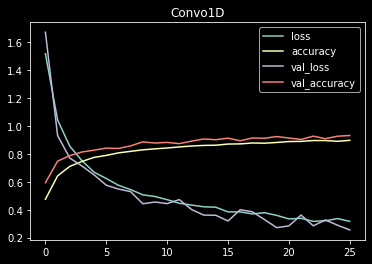

In [92]:
plt.style.use("dark_background")

Grap_Data = pd.DataFrame(Conv1D_Model.history)
Grap_Data.plot(title='Convo1D')

No handles with labels found to put in legend.


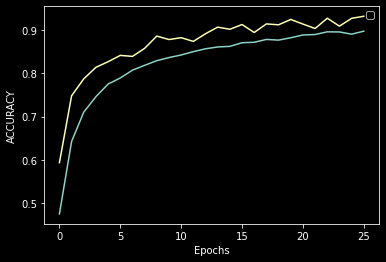

In [93]:
plt.plot(Conv1D_Model.history["accuracy"])
plt.plot(Conv1D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.xlabel("Epochs")
plt.legend()
plt.show()

No handles with labels found to put in legend.


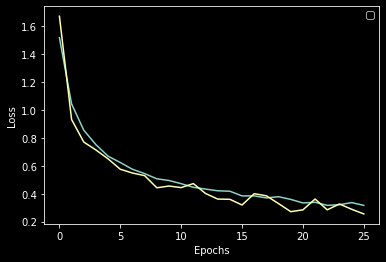

In [94]:
plt.plot(Conv1D_Model.history["loss"])
plt.plot(Conv1D_Model.history["val_loss"])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [69]:
Model_Results = Model_Conv1D.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

110/110 [==============================] - 1s 10ms/step - loss: 0.2554 - accuracy: 0.9319
LOSS:  0.2554
ACCURACY:  0.9319


In [70]:
prediction_test = Model_Conv1D.predict(xTest)
y_prediction = OHE_Function.inverse_transform(prediction_test)

yTest = OHE_Function.inverse_transform(yTest)

In [71]:
print(prediction_test[0:5])
print("---"*20)
print(y_prediction[0:5])
print("---"*20)
print(yTest[0:5])

[[6.60596152e-06 1.10549365e-04 8.45787290e-05 1.05887839e-05
  2.98409705e-05 9.99746263e-01 1.79645032e-09 2.89583511e-07
  1.37068048e-06 9.88501688e-06]
 [8.43073125e-04 5.21757524e-04 4.89684716e-02 8.19622725e-02
  7.28321493e-01 1.58967276e-03 9.21889171e-02 4.07913700e-02
  3.47388501e-04 4.46560048e-03]
 [9.94788170e-01 2.71930603e-05 2.73968151e-04 4.10969695e-03
  9.19603053e-07 3.12456068e-05 2.62032627e-05 4.39140649e-07
  1.15441508e-05 7.30731175e-04]
 [9.99855876e-01 9.13054828e-06 1.26989917e-05 2.02785395e-05
  2.03694817e-05 3.22149572e-05 4.18295887e-09 3.39271428e-05
  5.79482503e-06 9.50492176e-06]
 [1.67734324e-04 9.81526792e-01 3.46595189e-05 2.40508793e-03
  1.24174198e-02 2.87784087e-06 5.44667529e-08 1.44997990e-04
  4.47757338e-05 3.25559103e-03]]
------------------------------------------------------------
[['engine_idling']
 ['drilling']
 ['air_conditioner']
 ['air_conditioner']
 ['car_horn']]
------------------------------------------------------------
[[

In [72]:
conf_matrix = confusion_matrix(yTest, y_prediction)
acc_score = accuracy_score(yTest, y_prediction)
class_report = classification_report(yTest, y_prediction)

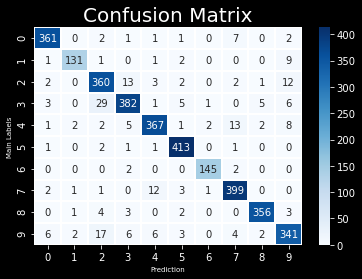

In [73]:
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix', size=20)
plt.xlabel('Prediction', size=7)
plt.ylabel('Main Labels', size=7)
plt.show()

In [74]:
print(acc_score)
print("---"*20)
print(class_report)

0.9318637274549099
------------------------------------------------------------
                  precision    recall  f1-score   support

 air_conditioner       0.96      0.96      0.96       375
        car_horn       0.96      0.90      0.93       145
children_playing       0.86      0.91      0.89       395
        dog_bark       0.92      0.88      0.90       432
        drilling       0.94      0.91      0.92       403
   engine_idling       0.96      0.99      0.97       419
        gun_shot       0.97      0.97      0.97       149
      jackhammer       0.93      0.95      0.94       419
           siren       0.97      0.96      0.97       369
    street_music       0.90      0.88      0.89       387

        accuracy                           0.93      3493
       macro avg       0.94      0.93      0.93      3493
    weighted avg       0.93      0.93      0.93      3493



## Conv2D

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(Part_X, Part_Y_Encode, train_size=0.9, random_state = 42, shuffle=True)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(31435, 168)
(31435, 10)
(3493, 168)
(3493, 10)


In [78]:
X_train = X_train.reshape(X_train.shape[0], 21, 8, 1)
X_test = X_test.reshape(X_test.shape[0], 21, 8, 1)

print(X_train.shape)
print(X_test.shape)

(31435, 21, 8, 1)
(3493, 21, 8, 1)


In [79]:
Call_Back_Check_Conv2D = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_Conv2D_model")

In [80]:
Model_Conv2D = Sequential()
#
Model_Conv2D.add(Conv2D(64,(3, 3),padding="same",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))
#
Model_Conv2D.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
Model_Conv2D.add(Dropout(0.3))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))
#
Model_Conv2D.add(Conv2D(256, (3, 3), padding = "same", activation = "relu"))
Model_Conv2D.add(Dropout(0.3))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))
#
Model_Conv2D.add(Flatten())
Model_Conv2D.add(Dense(1024, activation = "relu"))
Model_Conv2D.add(Dropout(0.5))
Model_Conv2D.add(Dense(output_labels, activation = "softmax"))

In [81]:
Model_Conv2D.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [82]:
Conv2D_Model = Model_Conv2D.fit(X_train, Y_train, batch_size=64, epochs=50,
                                validation_data=(X_test, Y_test), callbacks=[Call_Back_Early_Stop,Call_Back_Check_Conv2D])

Epoch 1/50
492/492 [==============================] - 11s 23ms/step - loss: 1.8790 - accuracy: 0.3720 - val_loss: 1.4054 - val_accuracy: 0.5374
Epoch 2/50
492/492 [==============================] - 11s 22ms/step - loss: 1.3540 - accuracy: 0.5366 - val_loss: 1.1053 - val_accuracy: 0.6567
Epoch 3/50
492/492 [==============================] - 11s 23ms/step - loss: 1.1525 - accuracy: 0.6102 - val_loss: 0.9791 - val_accuracy: 0.6925
Epoch 4/50
492/492 [==============================] - 12s 24ms/step - loss: 1.0372 - accuracy: 0.6519 - val_loss: 0.8618 - val_accuracy: 0.7409
Epoch 5/50
492/492 [==============================] - 12s 24ms/step - loss: 0.9086 - accuracy: 0.6938 - val_loss: 0.7497 - val_accuracy: 0.7535
Epoch 6/50
492/492 [==============================] - 12s 24ms/step - loss: 0.8402 - accuracy: 0.7156 - val_loss: 0.6771 - val_accuracy: 0.7916
Epoch 7/50
492/492 [==============================] - 13s 26ms/step - loss: 0.7787 - accuracy: 0.7397 - val_loss: 0.5934 - val_accuracy:

In [84]:
print(Model_Conv2D.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 8, 64)         640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 4, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 4, 128)        73856     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 4, 128)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 2, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 2, 256)         295168    
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 2, 256)        

<AxesSubplot:title={'center':'Convo2D'}>

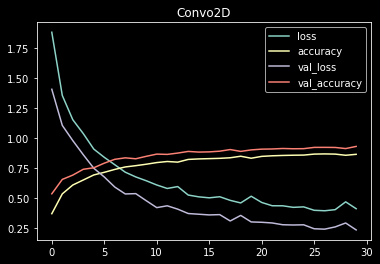

In [91]:
Grap_Data_Conv2D = pd.DataFrame(Conv2D_Model.history)
Grap_Data_Conv2D.plot(title='Convo2D')

No handles with labels found to put in legend.


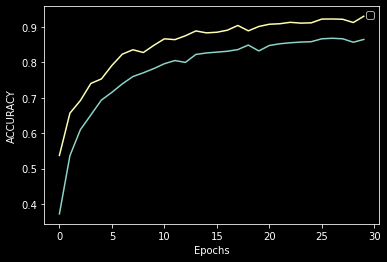

In [95]:
plt.plot(Conv2D_Model.history["accuracy"])
plt.plot(Conv2D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.xlabel("Epochs")
plt.legend()
plt.show()

No handles with labels found to put in legend.


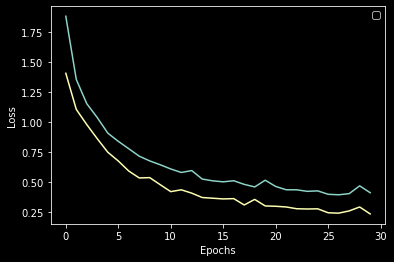

In [96]:
plt.plot(Conv2D_Model.history["loss"])
plt.plot(Conv2D_Model.history["val_loss"])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [97]:
Model_Results_Conv2D = Model_Conv2D.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_Conv2D[0])
print("ACCURACY:  " + "%.4f" % Model_Results_Conv2D[1])

110/110 [==============================] - 0s 3ms/step - loss: 0.2373 - accuracy: 0.9307
LOSS:  0.2373
ACCURACY:  0.9307


In [98]:
prediction_test_Conv2D = Model_Conv2D.predict(X_test)
prediction_test_Conv2D_Arg = np.argmax(prediction_test_Conv2D,axis=1)

In [99]:
# prediction checking

print(prediction_test_Conv2D_Arg)
y_prediction_Conv2D = OHE_Function.inverse_transform(prediction_test_Conv2D)

[5 4 0 ... 2 8 3]


In [109]:
Y_test = OHE_Function.inverse_transform(Y_test)

In [111]:
print(prediction_test_Conv2D[0:5])
print("---"*20)
print(y_prediction_Conv2D[0:5])
print("---"*20)
print(Y_test[0:5])

[[3.6071465e-10 4.7739420e-08 2.1976759e-06 6.3393943e-09 7.8477774e-10
  9.9999750e-01 2.4543479e-07 1.6581635e-10 3.0881939e-10 2.2298332e-08]
 [1.2145509e-03 2.5396182e-03 3.5858363e-02 2.4983194e-02 8.5262507e-01
  1.3631537e-03 2.7576225e-02 2.5889628e-02 4.3312385e-04 2.7517218e-02]
 [1.0000000e+00 4.6959241e-24 3.1037714e-15 1.9841652e-18 5.2279950e-19
  1.2891733e-16 4.2289932e-21 4.5196027e-20 1.0552112e-16 7.2296628e-13]
 [9.9999559e-01 2.2804686e-10 1.1681517e-07 1.1751392e-06 9.0284171e-09
  4.7183266e-07 2.2141298e-09 1.1618861e-06 3.9122920e-08 1.4793569e-06]
 [3.3068584e-08 9.9942577e-01 2.6162836e-05 2.8418834e-05 4.4445379e-04
  2.0946960e-07 3.7137097e-06 8.0174823e-06 1.3702693e-05 4.9584462e-05]]
------------------------------------------------------------
[['engine_idling']
 ['drilling']
 ['air_conditioner']
 ['air_conditioner']
 ['car_horn']]
------------------------------------------------------------
[['engine_idling']
 ['drilling']
 ['air_conditioner']
 ['air_c

In [113]:
conf_matrix = confusion_matrix(Y_test, y_prediction_Conv2D)
acc_score = accuracy_score(Y_test, y_prediction_Conv2D)
class_report = classification_report(Y_test, y_prediction_Conv2D)

In [114]:
print(acc_score)
print("---"*20)
print(class_report)

0.9307185800171772
------------------------------------------------------------
                  precision    recall  f1-score   support

 air_conditioner       0.94      0.97      0.96       375
        car_horn       0.98      0.88      0.93       145
children_playing       0.81      0.94      0.87       395
        dog_bark       0.97      0.83      0.89       432
        drilling       0.92      0.96      0.94       403
   engine_idling       0.96      0.97      0.97       419
        gun_shot       0.96      0.97      0.97       149
      jackhammer       0.95      0.97      0.96       419
           siren       0.95      0.96      0.96       369
    street_music       0.91      0.86      0.89       387

        accuracy                           0.93      3493
       macro avg       0.94      0.93      0.93      3493
    weighted avg       0.93      0.93      0.93      3493



## LSTM

In [115]:
X_train_lstm, X_test_lstm, Y_train_lstm, Y_test_lstm = train_test_split(Part_X, Part_Y_Encode, train_size=0.9, random_state = 42, shuffle=True)

print(X_train_lstm.shape)
print(Y_train_lstm.shape)
print(X_test_lstm.shape)
print(Y_test_lstm.shape)

(31435, 168)
(31435, 10)
(3493, 168)
(3493, 10)


In [133]:
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], 21, 8, 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], 21, 8, 1)

print(X_train_lstm.shape[1:])
print(X_test_lstm.shape)

(21, 8, 1)
(3493, 21, 8, 1)


In [130]:
Call_Back_Check_LSTM = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_LSTM_model")

# Conv2D_Model = Model_Conv2D.fit(X_train, Y_train, batch_size=64, epochs=50,
#                                 validation_data=(X_test, Y_test), callbacks=[Call_Back_Early_Stop,Call_Back_Check_Conv2D])

In [136]:
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam

#Adding the input LSTM network layer
model_LSTM = Sequential()
model_LSTM.add(LSTM(128, input_shape=(168,1), return_sequences=True))
model_LSTM.add(Dropout(0.2))
# model_LSTM.add(Dense(10, activation='softmax'))

#Adding a second LSTM network layer
model_LSTM.add(LSTM(128))

#Adding a dense hidden layer
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dropout(0.2))

#Adding the output layer
model_LSTM.add(Dense(10, activation='softmax'))

NotImplementedError: Cannot convert a symbolic Tensor (lstm_9/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
model_LSTM.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)
model_LSTM.fit(X_train_lstm, Y_train_lstm, epochs=50, batch_size=64, verbose=2, 
               validation_data=(X_test_lstm, Y_test_lstm), callbacks=[Call_Back_Early_Stop,Call_Back_Check_LSTM])

In [140]:
import numpy
print(numpy.__version__)

1.20.1


## alternate way

In [142]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torchaudio
import torch
import torch.nn as nn
from sklearn import model_selection
from sklearn import metrics
from tabulate import tabulate # tabulate print
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import warnings
warnings.filterwarnings("ignore") # Ignore All Warnings

In [143]:
# # model
# class AudioLSTM(nn.Module):

#     def __init__(self, n_feature=5, out_feature=5, n_hidden=256, n_layers=2, drop_prob=0.3):
#         super().__init__()
#         self.drop_prob = drop_prob
#         self.n_layers = n_layers
#         self.n_hidden = n_hidden
#         self.n_feature = n_feature
#         self.lstm = nn.LSTM(self.n_feature, self.n_hidden, self.n_layers, dropout=self.drop_prob, batch_first=True)
#         self.dropout = nn.Dropout(drop_prob)
#         self.relu = nn.ReLU()
#         self.fc1 = nn.Linear(int(n_hidden), int(n_hidden/2))
#         self.fc2 = nn.Linear(int(n_hidden/2), out_feature)

#     def forward(self, x, hidden):
#         # x.shape (batch, seq_len, n_features)
#         l_out, l_hidden = self.lstm(x, hidden)
#         # out.shape (batch, seq_len, n_hidden*direction)
#         out = self.dropout(l_out)
#         # out.shape (batch, out_feature)
#         out = self.fc1(out)
#         out = self.fc2(out[:, -1, :])
# #         print(out.shape)
#         # return the final output and the hidden state
#         return out, l_hidden

#     def init_hidden(self, batch_size):
#         weight = next(self.parameters()).data
#         hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda(),
#                   weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda())
# #         print(hidden[0].shape)
#         return hidden

In [144]:
# # Tensorboard
# from torch.utils.tensorboard import SummaryWriter
# writer = SummaryWriter()

In [145]:
# def save_model(state, filename):
#     torch.save(state, filename)
#     print("-> Model Saved")

In [146]:
# # Train Set
# def train(data_loader, model, epoch, optimizer, device):
#     losses = []
#     accuracies = []
#     labels = []
#     preds = []
#     model.train()
#     loop = tqdm(data_loader) # for progress bar
#     for batch_idx, (data, target) in enumerate(loop):
#         data = data.to(device)
#         target = target.to(device)
#         model.zero_grad()
#         output, hidden_state = model(data, model.init_hidden(128))
#         loss = nn.CrossEntropyLoss()(output, target)
#         loss.backward()
#         optimizer.step()
#         losses.append(loss.item())
#         probs = torch.softmax(output, dim=1)
#         winners = probs.argmax(dim=1)
#         corrects = (winners == target)
#         accuracy = corrects.sum().float() / float(target.size(0))
#         accuracies.append(accuracy)
#         labels += torch.flatten(target).cpu()
#         preds += torch.flatten(winners).cpu()
#         loop.set_description(f"EPOCH: {epoch} | ITERATION : {batch_idx}/{len(data_loader)} | LOSS: {loss.item()} | ACCURACY: {accuracy}")
#         loop.set_postfix(loss=loss.item())
        
#     avg_train_loss = sum(losses) / len(losses)
#     avg_train_accuracy = sum(accuracies) / len(accuracies)
#     report = metrics.classification_report(torch.tensor(labels).numpy(), torch.tensor(preds).numpy())
#     print(report)
#     return avg_train_loss, avg_train_accuracy

In [147]:
# # Test Setting
# def test(data_loader, model, optimizer, device):
#     model.eval()
#     accs = []
#     preds = []
#     labels = []
#     test_accuracies = []
#     with torch.no_grad():
#         loop = tqdm(data_loader) # Test progress bar
#         for batch_idx, (data, target) in enumerate(loop):
#             data = data.to(device)
#             target = target.to(device)
#             output, hidden_state = model(data, model.init_hidden(128))
#             probs = torch.softmax(output, dim=1)
#             winners = probs.argmax(dim=1)
#             corrects = (winners == target)
#             accuracy = corrects.sum().float() / float(target.size(0))
            
#             test_accuracies.append(accuracy)
#             labels += torch.flatten(target).cpu()
#             preds += torch.flatten(winners).cpu()
#     avg_test_acc = sum(test_accuracies) / len(test_accuracies)
#     return avg_test_acc

In [148]:
# # Epoch
# EPOCH = 50
# OUT_FEATURE = 10 # class
# PATIENCE = 5

In [ ]:
# def main():
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model = AudioLSTM(n_feature=168, out_feature=OUT_FEATURE).to(device)

#     optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
#     scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max", patience=PATIENCE)
    
#     best_train_acc, best_epoch = 0, 0 # update acc and epoch
    
#     for epoch in range(EPOCH):
#         avg_train_loss, avg_train_acc = train(X_train_lstm, Y_train_lstm model, epoch, optimizer, device)
#         avg_test_acc = test(Y_test_lstm, model, optimizer, device)
#         scheduler.step(avg_train_acc)
#         if avg_train_acc > best_train_acc:
#             best_train_acc = avg_train_acc
#             best_epoch = epoch
#             filename = f"best_model_at_epoch_{best_epoch}.pth.tar"
#             checkpoint = {"state_dict": model.state_dict(), "optimizer": optimizer.state_dict()}
#             save_model(checkpoint, filename)
        
#         table = [
#             ["avg_train_loss", avg_train_loss], ["avg_train_accuracy", avg_train_acc],
#             ["best_train_acc", best_train_acc], ["best_epoch", best_epoch]
#         ]
#         print(tabulate(table)) # tabulate View
#         test_table = [
#             ["Avg test accuracy", avg_test_acc]
#         ]
#         writer.add_scalar('Loss/train', avg_train_loss, epoch)
#         writer.add_scalar('Accuracy/train', avg_train_acc, epoch)
#         writer.add_scalar('Accuracy/test', avg_test_acc, epoch)
#         print(tabulate(test_table)) # tabulate View

# if __name__ == "__main__":
#     main() # Run function